In [1]:
import finesse.virgo
import matplotlib.pyplot as plt
import numpy as np

finesse.init_plotting()

# Plotting Examples

This package has several plotting functions available:

1. QNLS
2. DARM transfer function
3. DOF plots
4. Error signals

In [2]:
# prepare a pretuned Virgo model
virgo = finesse.virgo.Virgo()
virgo.make()

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


## 1. Plotting the QNLS curve

<Axes: title={'center': 'Quantum Noise Limited Sensitivity'}, xlabel='fsig.f [Hz]', ylabel='ASD [1/$\\sqrt{Hz}$]'>

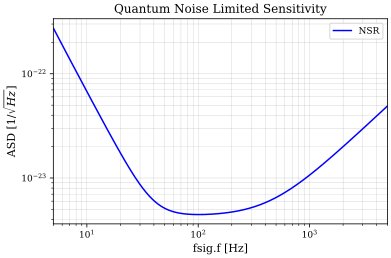

In [3]:
# plot the QNLS curve directly
virgo.plot_QNLS()

<Axes: title={'center': 'Quantum Noise Limited Sensitivity'}, xlabel='fsig.f [Hz]', ylabel='ASD [1/$\\sqrt{Hz}$]'>

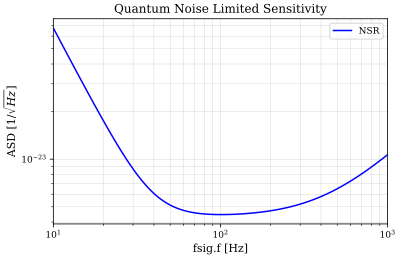

In [4]:
# plot the QNLS curve with a user-defined axis
virgo.plot_QNLS(axis=[1e1, 1e3, 100])

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1769386/1898343421.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('ASD [1/$\sqrt{Hz}$]');


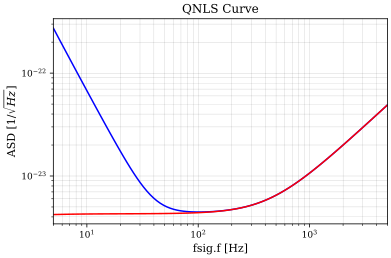

In [5]:
# create a custom QNLS plot
qnls = virgo.get_QNLS(axis=[5, 5e3, 100])

plt.loglog(qnls.x1, abs(qnls["NSR_with_RP"]), qnls.x1, abs(qnls["NSR_without_RP"]))
plt.title('QNLS Curve')
plt.xlabel('fsig.f [Hz]')
plt.ylabel('ASD [1/$\sqrt{Hz}$]');

## 2. Plotting DARM Transfer Function

array([<Axes: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <Axes: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

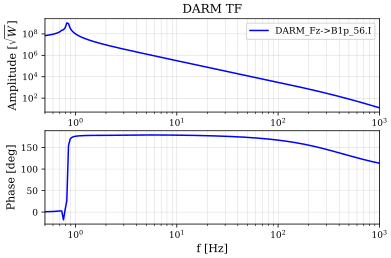

In [6]:
# plot the DARM TF directly
virgo.plot_DARM()

array([<Axes: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <Axes: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

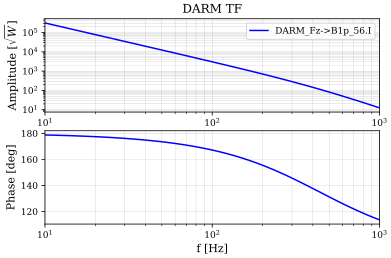

In [7]:
# plot the DARM TF with a user-defined axis
virgo.plot_DARM(axis=[1e1, 1e3, 100])

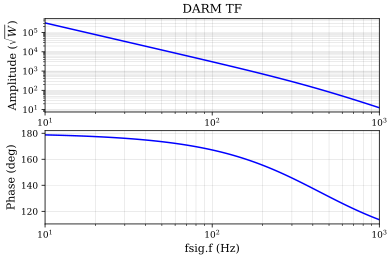

In [8]:
# create a custom DARM TF plot
darm_tf = virgo.get_DARM(axis=[1e1, 1e3, 100])

fig, axs = plt.subplots(2)

H = darm_tf.out[:, 0, 0].squeeze()
axs[0].loglog(darm_tf.f, abs(H))
axs[1].semilogx(darm_tf.f, np.angle(H)*180/np.pi)

axs[0].set_title("DARM TF")
axs[0].set_ylabel(r"Amplitude ($\sqrt{W}$)")
axs[1].set_ylabel("Phase (deg)")
axs[1].set_xlabel("fsig.f (Hz)");

## 3. DOF Plots
Provide a DOF and a detector to plot detector output vs DOF tuning. Provide `xscale` to set the x-axis range.

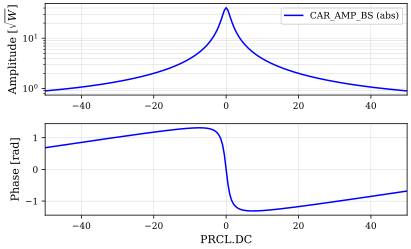

<ArraySolution of xaxis @ 0x74def1ed8d00 children=0>

In [9]:
# tune PRCL and plot the amplitude of the carrier on the beam splitter
virgo.dof_plot("PRCL", "CAR_AMP_BS", xscale=50)

## 4. Error Signals
Plots DOF plots (see above) for each dof/readout defined in the control scheme.

(<Figure size 768x576 with 6 Axes>,
 array([<Axes: xlabel='PRCL [deg]', ylabel='B2_8_I [W]'>,
        <Axes: xlabel='MICH [deg]', ylabel='B2_56_Q [W]'>,
        <Axes: xlabel='CARM [deg]', ylabel='B2_6_I [W]'>,
        <Axes: xlabel='DARM [deg]', ylabel='B1p_56_I [W]'>,
        <Axes: xlabel='DARM [deg]', ylabel='B1_DC [W]'>,
        <Axes: xlabel='SRCL [deg]', ylabel='B2_56_I [W]'>], dtype=object))

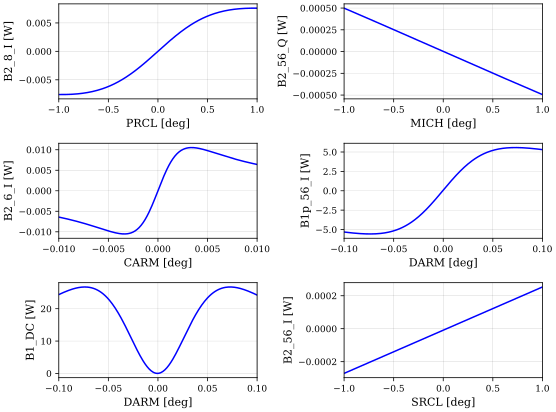

In [10]:
virgo.plot_error_signals()